In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [451]:
data = pd.read_parquet('data.parquet')

In [452]:
data.isna().sum()

banknifty    1500
nifty        2000
tte             0
dtype: int64

In [453]:
null_rows = data[data.isnull().any(axis = 1)]

In [454]:
data = data.reset_index()

In [455]:
null_rows = data[data.isnull().any(axis = 1)]

In [456]:
null_rows

,time,banknifty,nifty,tte
204,2021-01-01 12:39:00,0.256850,NaN,27
730,2021-01-01 21:25:00,NaN,0.178049,27
903,2021-01-02 00:18:00,0.255651,NaN,27
993,2021-01-02 01:48:00,NaN,0.178049,27
1094,2021-01-02 03:29:00,NaN,0.178049,27
...,...,...,...,...
689460,2022-06-29 21:59:00,NaN,0.214376,29
689501,2022-06-29 22:40:00,NaN,0.214376,29
689520,2022-06-29 22:59:00,0.243723,NaN,29
690008,2022-06-30 07:07:00,NaN,0.214376,29


In [457]:
start_time = pd.to_datetime('09:15:00').time()
end_time = pd.to_datetime('15:30:00').time()

In [458]:
data = data.set_index('time')
filtered_data = data.between_time(start_time , end_time)

In [459]:
len(data) - len(filtered_data)

509656

In [460]:
len(data)

690512

In [461]:
filtered_data

,banknifty,nifty,tte
time,,,
2021-01-01 09:15:00,0.286058,0.199729,27
2021-01-01 09:16:00,0.285381,0.200433,27
2021-01-01 09:17:00,0.284233,0.200004,27
2021-01-01 09:18:00,0.286104,0.199860,27
2021-01-01 09:19:00,0.285539,0.198951,27
...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28
2022-06-30 15:27:00,0.240875,0.216558,28
2022-06-30 15:28:00,0.242115,0.216794,28


In [462]:
filtered_data.isna().sum()

banknifty    370
nifty        477
tte            0
dtype: int64

In [463]:
null_rows = filtered_data[filtered_data.isnull().any(axis = 1)]

In [464]:
null_rows

,banknifty,nifty,tte
time,,,
2021-01-01 12:39:00,0.256850,NaN,27
2021-01-02 12:38:00,0.255651,NaN,27
2021-01-04 10:33:00,0.258322,NaN,24
2021-01-04 13:25:00,NaN,0.184289,24
2021-01-05 12:44:00,0.262732,NaN,23
...,...,...,...
2022-06-28 13:33:00,NaN,0.223658,2
2022-06-28 13:51:00,0.235283,NaN,30
2022-06-29 12:40:00,0.235789,NaN,29


In [465]:
filtered_data['banknifty'] = filtered_data['banknifty'].fillna(method = 'ffill')

C:\Users\vagha\AppData\Local\Temp\ipykernel_8372\752998155.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filtered_data['banknifty'] = filtered_data['banknifty'].fillna(method = 'ffill')
C:\Users\vagha\AppData\Local\Temp\ipykernel_8372\752998155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['banknifty'] = filtered_data['banknifty'].fillna(method = 'ffill')


In [466]:
filtered_data['nifty'] = filtered_data['nifty'].fillna(method = 'ffill')

C:\Users\vagha\AppData\Local\Temp\ipykernel_8372\2430553360.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filtered_data['nifty'] = filtered_data['nifty'].fillna(method = 'ffill')
C:\Users\vagha\AppData\Local\Temp\ipykernel_8372\2430553360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['nifty'] = filtered_data['nifty'].fillna(method = 'ffill')


In [467]:
filtered_data['spread'] = filtered_data['banknifty'] - filtered_data['nifty']

C:\Users\vagha\AppData\Local\Temp\ipykernel_8372\4292050538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['spread'] = filtered_data['banknifty'] - filtered_data['nifty']


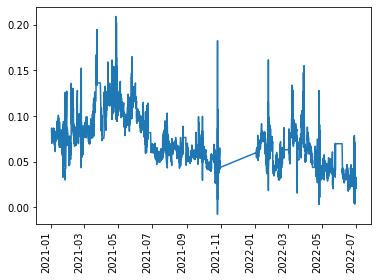

In [468]:
plt.xticks(rotation=90, ha='right')
plt.plot(filtered_data['spread'])

In [469]:
filtered_data['z-score'] = (filtered_data['spread'] - filtered_data['spread'].mean())/(filtered_data['spread'].std())

C:\Users\vagha\AppData\Local\Temp\ipykernel_8372\3468593221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['z-score'] = (filtered_data['spread'] - filtered_data['spread'].mean())/(filtered_data['spread'].std())


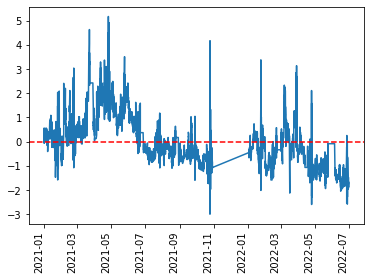

In [470]:
plt.xticks(rotation = 90, ha = 'right')
plt.plot(filtered_data['z-score'])
plt.axhline(y=0, color='r', linestyle='--', label='mean_spread')

In [471]:
# zero_spread = (-filtered_data['spread'].mean())/(filtered_data['spread'].std())

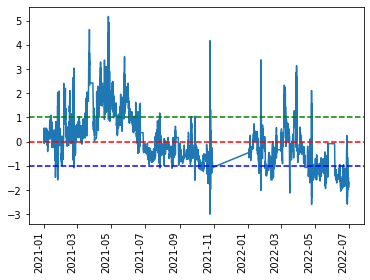

In [472]:
plt.xticks(rotation = 90, ha = 'right')
plt.plot(filtered_data['z-score'])
plt.axhline(y=0, color='r', linestyle='--', label='mean_spread')
plt.axhline(y=1, color='g', linestyle='--', label='+1 STD')
plt.axhline(y=-1,color='b', linestyle='--', label='-1 STD')
# plt.axhline(y=zero_spread , color = 'g' , linestyle='--' , label = 'zero_spread')

In [473]:
filtered_data

,banknifty,nifty,tte,spread,z-score
time,,,,,
2021-01-01 09:15:00,0.286058,0.199729,27,0.086329,0.543746
2021-01-01 09:16:00,0.285381,0.200433,27,0.084948,0.491734
2021-01-01 09:17:00,0.284233,0.200004,27,0.084229,0.464627
2021-01-01 09:18:00,0.286104,0.199860,27,0.086244,0.540524
2021-01-01 09:19:00,0.285539,0.198951,27,0.086588,0.553504
...,...,...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28,0.025943,-1.731339
2022-06-30 15:27:00,0.240875,0.216558,28,0.024317,-1.792618
2022-06-30 15:28:00,0.242115,0.216794,28,0.025321,-1.754773


In [474]:
filtered_data['max_spread'] = filtered_data['spread'].rolling(window='5D').max()

C:\Users\vagha\AppData\Local\Temp\ipykernel_8372\4215646283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['max_spread'] = filtered_data['spread'].rolling(window='5D').max()


In [475]:
filtered_data['max_spread_unique'] = filtered_data['max_spread'].shift(1) - filtered_data['max_spread']

C:\Users\vagha\AppData\Local\Temp\ipykernel_8372\1547417247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['max_spread_unique'] = filtered_data['max_spread'].shift(1) - filtered_data['max_spread']


In [476]:
filtered_data['max_spread_unique'] = (filtered_data['max_spread'] != filtered_data['max_spread'].shift(fill_value=filtered_data['max_spread'].iloc[0])).astype(int)

C:\Users\vagha\AppData\Local\Temp\ipykernel_8372\3679453823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['max_spread_unique'] = (filtered_data['max_spread'] != filtered_data['max_spread'].shift(fill_value=filtered_data['max_spread'].iloc[0])).astype(int)


In [477]:
filtered_data

,banknifty,nifty,tte,spread,z-score,max_spread,max_spread_unique
time,,,,,,,
2021-01-01 09:15:00,0.286058,0.199729,27,0.086329,0.543746,0.086329,0
2021-01-01 09:16:00,0.285381,0.200433,27,0.084948,0.491734,0.086329,0
2021-01-01 09:17:00,0.284233,0.200004,27,0.084229,0.464627,0.086329,0
2021-01-01 09:18:00,0.286104,0.199860,27,0.086244,0.540524,0.086329,0
2021-01-01 09:19:00,0.285539,0.198951,27,0.086588,0.553504,0.086588,1
...,...,...,...,...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28,0.025943,-1.731339,0.078673,0
2022-06-30 15:27:00,0.240875,0.216558,28,0.024317,-1.792618,0.078673,0
2022-06-30 15:28:00,0.242115,0.216794,28,0.025321,-1.754773,0.078673,0


In [478]:
avg_z_score = filtered_data.loc[filtered_data['max_spread_unique'] == 1 , 'z-score'].mean()

In [479]:
avg_z_score

0.24481994692546977

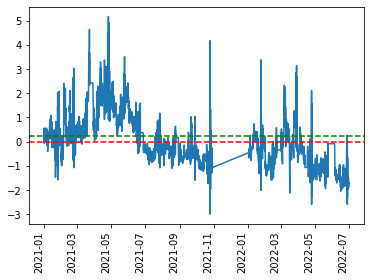

In [480]:
plt.xticks(rotation = 90, ha = 'right')
plt.plot(filtered_data['z-score'])
plt.axhline(y=0, color='r', linestyle='--', label='mean_spread')
plt.axhline(y=avg_z_score , color='g',linestyle='--', label='signal')

In [481]:
rule = (filtered_data['max_spread_unique'] == 1) & (filtered_data['z-score'] > avg_z_score)
selected_rows = filtered_data.loc[rule]
filtered_data.loc[rule , 'P&L'] = (selected_rows['max_spread'])*(selected_rows['tte'])**0.7

C:\Users\vagha\AppData\Local\Temp\ipykernel_8372\2934673609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[rule , 'P&L'] = (selected_rows['max_spread'])*(selected_rows['tte'])**0.7


In [482]:
selected_rows

,banknifty,nifty,tte,spread,z-score,max_spread,max_spread_unique
time,,,,,,,
2021-01-01 09:19:00,0.285539,0.198951,27,0.086588,0.553504,0.086588,1
2021-01-01 09:25:00,0.283414,0.196805,27,0.086609,0.554276,0.086609,1
2021-01-04 14:55:00,0.265680,0.179007,24,0.086673,0.556687,0.086673,1
2021-01-04 14:57:00,0.265749,0.178893,24,0.086856,0.563601,0.086856,1
2021-01-09 14:57:00,0.251949,0.173267,20,0.078682,0.255621,0.086338,1
...,...,...,...,...,...,...,...
2022-04-04 10:14:00,0.255965,0.168131,24,0.087833,0.600410,0.087833,1
2022-04-25 09:20:00,0.305586,0.192712,31,0.112874,1.543847,0.112874,1
2022-04-25 09:22:00,0.306576,0.193133,31,0.113443,1.565285,0.113443,1


In [483]:
#calculating metrics
total_pnl_zscore = filtered_data['P&L'].sum()

In [484]:
volatility_zscore = (filtered_data['P&L'].std())*np.sqrt(252)
sharpe_ratio_zscore = ((filtered_data['P&L'].mean()*252) - 0.07) / volatility

In [485]:
sharpe_ratio_zscore

57.317388705554

C:\Users\vagha\AppData\Local\Temp\ipykernel_8372\2201264200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['spread*tte'] = filtered_data['spread']*filtered_data['tte']


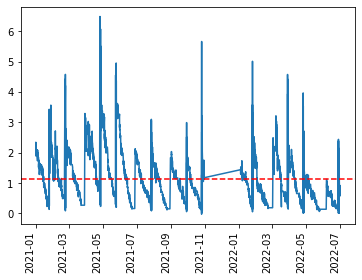

In [486]:
filtered_data['spread*tte'] = filtered_data['spread']*filtered_data['tte']
plt.xticks(rotation = 90, ha = 'right')
plt.plot(filtered_data['spread']*filtered_data['tte'])
plt.axhline(y=filtered_data['spread*tte'].mean(), color='r', linestyle='--', label='mean_spread')

In [487]:
mean_sct = filtered_data['spread*tte'].mean()

In [488]:
#number data above mean
above_mean_count = len(filtered_data[filtered_data['spread*tte'] > mean_sct])
above_mean_count

79182

In [489]:
above_mean_data = filtered_data[filtered_data['spread*tte'] > mean_sct]
distance_from_mean = above_mean_data['spread*tte'] - mean_sct
average_distance = distance_from_mean.mean()

In [490]:
average_distance

0.722031493607842

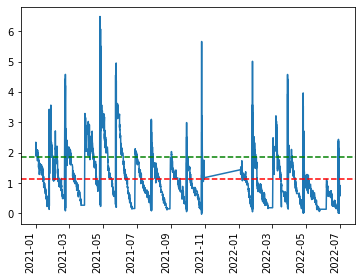

In [491]:
plt.xticks(rotation = 90, ha = 'right')
plt.plot(filtered_data['spread']*filtered_data['tte'])
plt.axhline(y=filtered_data['spread*tte'].mean(), color='r', linestyle='--', label='mean_spread')
plt.axhline(y=average_distance+mean_sct, color='g', linestyle='--')

In [492]:
average_distance + mean_sct

1.8608541094251219

In [493]:
filtered_data = filtered_data.reset_index()

In [494]:
filtered_data = filtered_data.rename(columns={'time': 'datetime'})

In [495]:
filtered_data['time'] = filtered_data['datetime'].dt.time

In [496]:
filtered_data['marked_trades'] = (filtered_data['spread*tte'] > (average_distance + mean_sct)).astype(int)

In [497]:
condition = filtered_data['time'].apply(lambda x: x.minute % 15 == 0)
filtered_data['marked_trades'] = filtered_data['marked_trades'].where(condition, 0)

In [498]:
filtered_data

,datetime,banknifty,nifty,tte,spread,z-score,max_spread,max_spread_unique,P&L,spread*tte,time,marked_trades
0,2021-01-01 09:15:00,0.286058,0.199729,27,0.086329,0.543746,0.086329,0,NaN,2.330883,09:15:00,1
1,2021-01-01 09:16:00,0.285381,0.200433,27,0.084948,0.491734,0.086329,0,NaN,2.293609,09:16:00,0
2,2021-01-01 09:17:00,0.284233,0.200004,27,0.084229,0.464627,0.086329,0,NaN,2.274183,09:17:00,0
3,2021-01-01 09:18:00,0.286104,0.199860,27,0.086244,0.540524,0.086329,0,NaN,2.328575,09:18:00,0
4,2021-01-01 09:19:00,0.285539,0.198951,27,0.086588,0.553504,0.086588,1,0.869786,2.337876,09:19:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
180851,2022-06-30 15:26:00,0.240701,0.214758,28,0.025943,-1.731339,0.078673,0,NaN,0.726404,15:26:00,0
180852,2022-06-30 15:27:00,0.240875,0.216558,28,0.024317,-1.792618,0.078673,0,NaN,0.680862,15:27:00,0
180853,2022-06-30 15:28:00,0.242115,0.216794,28,0.025321,-1.754773,0.078673,0,NaN,0.708988,15:28:00,0
180854,2022-06-30 15:29:00,0.243426,0.216455,28,0.026971,-1.692608,0.078673,0,NaN,0.755188,15:29:00,0


In [499]:
rule = (filtered_data['marked_trades'] == 1)
selected_rows = filtered_data.loc[rule]
filtered_data.loc[rule , 'P&L_new'] = (selected_rows['spread'])*(selected_rows['tte'])**0.7

In [500]:
filtered_data

,datetime,banknifty,nifty,tte,spread,z-score,max_spread,max_spread_unique,P&L,spread*tte,time,marked_trades,P&L_new
0,2021-01-01 09:15:00,0.286058,0.199729,27,0.086329,0.543746,0.086329,0,NaN,2.330883,09:15:00,1,0.867184
1,2021-01-01 09:16:00,0.285381,0.200433,27,0.084948,0.491734,0.086329,0,NaN,2.293609,09:16:00,0,NaN
2,2021-01-01 09:17:00,0.284233,0.200004,27,0.084229,0.464627,0.086329,0,NaN,2.274183,09:17:00,0,NaN
3,2021-01-01 09:18:00,0.286104,0.199860,27,0.086244,0.540524,0.086329,0,NaN,2.328575,09:18:00,0,NaN
4,2021-01-01 09:19:00,0.285539,0.198951,27,0.086588,0.553504,0.086588,1,0.869786,2.337876,09:19:00,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180851,2022-06-30 15:26:00,0.240701,0.214758,28,0.025943,-1.731339,0.078673,0,NaN,0.726404,15:26:00,0,NaN
180852,2022-06-30 15:27:00,0.240875,0.216558,28,0.024317,-1.792618,0.078673,0,NaN,0.680862,15:27:00,0,NaN
180853,2022-06-30 15:28:00,0.242115,0.216794,28,0.025321,-1.754773,0.078673,0,NaN,0.708988,15:28:00,0,NaN
180854,2022-06-30 15:29:00,0.243426,0.216455,28,0.026971,-1.692608,0.078673,0,NaN,0.755188,15:29:00,0,NaN


In [501]:
rule = (filtered_data['marked_trades'] == 1)
selected_rows = filtered_data.loc[rule]

In [502]:
selected_rows = selected_rows.reset_index()

In [503]:
selected_rows.loc[(selected_rows.index) % 4 != 0, 'marked_trades'] = 0

In [504]:
selected_rows = selected_rows.set_index('index')

In [505]:
selected_rows

,datetime,banknifty,nifty,tte,spread,z-score,max_spread,max_spread_unique,P&L,spread*tte,time,marked_trades,P&L_new
index,,,,,,,,,,,,,
0,2021-01-01 09:15:00,0.286058,0.199729,27,0.086329,0.543746,0.086329,0,NaN,2.330883,09:15:00,1,0.867184
15,2021-01-01 09:30:00,0.277355,0.194941,27,0.082415,0.396283,0.086609,0,NaN,2.225205,09:30:00,0,0.827868
30,2021-01-01 09:45:00,0.271123,0.193464,27,0.077659,0.217079,0.086609,0,NaN,2.096780,09:45:00,0,0.780088
45,2021-01-01 10:00:00,0.268541,0.189188,27,0.079353,0.280939,0.086609,0,NaN,2.142544,10:00:00,0,0.797115
60,2021-01-01 10:15:00,0.265284,0.190035,27,0.075248,0.126261,0.086609,0,NaN,2.031696,10:15:00,1,0.755874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156040,2022-04-26 09:15:00,0.278780,0.188231,30,0.090550,0.702756,0.127910,0,NaN,2.716485,09:15:00,0,0.979199
156115,2022-04-26 10:30:00,0.248497,0.185622,30,0.062875,-0.339900,0.127910,0,NaN,1.886250,10:30:00,0,0.679928
156130,2022-04-26 10:45:00,0.248105,0.185769,30,0.062335,-0.360245,0.127910,0,NaN,1.870050,10:45:00,1,0.674088


In [506]:
filtered_data

,datetime,banknifty,nifty,tte,spread,z-score,max_spread,max_spread_unique,P&L,spread*tte,time,marked_trades,P&L_new
0,2021-01-01 09:15:00,0.286058,0.199729,27,0.086329,0.543746,0.086329,0,NaN,2.330883,09:15:00,1,0.867184
1,2021-01-01 09:16:00,0.285381,0.200433,27,0.084948,0.491734,0.086329,0,NaN,2.293609,09:16:00,0,NaN
2,2021-01-01 09:17:00,0.284233,0.200004,27,0.084229,0.464627,0.086329,0,NaN,2.274183,09:17:00,0,NaN
3,2021-01-01 09:18:00,0.286104,0.199860,27,0.086244,0.540524,0.086329,0,NaN,2.328575,09:18:00,0,NaN
4,2021-01-01 09:19:00,0.285539,0.198951,27,0.086588,0.553504,0.086588,1,0.869786,2.337876,09:19:00,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180851,2022-06-30 15:26:00,0.240701,0.214758,28,0.025943,-1.731339,0.078673,0,NaN,0.726404,15:26:00,0,NaN
180852,2022-06-30 15:27:00,0.240875,0.216558,28,0.024317,-1.792618,0.078673,0,NaN,0.680862,15:27:00,0,NaN
180853,2022-06-30 15:28:00,0.242115,0.216794,28,0.025321,-1.754773,0.078673,0,NaN,0.708988,15:28:00,0,NaN
180854,2022-06-30 15:29:00,0.243426,0.216455,28,0.026971,-1.692608,0.078673,0,NaN,0.755188,15:29:00,0,NaN


In [507]:
filtered_data.update(selected_rows)

In [508]:
filtered_data

,datetime,banknifty,nifty,tte,spread,z-score,max_spread,max_spread_unique,P&L,spread*tte,time,marked_trades,P&L_new
0,2021-01-01 09:15:00,0.286058,0.199729,27,0.086329,0.543746,0.086329,0,NaN,2.330883,09:15:00,1,0.867184
1,2021-01-01 09:16:00,0.285381,0.200433,27,0.084948,0.491734,0.086329,0,NaN,2.293609,09:16:00,0,NaN
2,2021-01-01 09:17:00,0.284233,0.200004,27,0.084229,0.464627,0.086329,0,NaN,2.274183,09:17:00,0,NaN
3,2021-01-01 09:18:00,0.286104,0.199860,27,0.086244,0.540524,0.086329,0,NaN,2.328575,09:18:00,0,NaN
4,2021-01-01 09:19:00,0.285539,0.198951,27,0.086588,0.553504,0.086588,1,0.869786,2.337876,09:19:00,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180851,2022-06-30 15:26:00,0.240701,0.214758,28,0.025943,-1.731339,0.078673,0,NaN,0.726404,15:26:00,0,NaN
180852,2022-06-30 15:27:00,0.240875,0.216558,28,0.024317,-1.792618,0.078673,0,NaN,0.680862,15:27:00,0,NaN
180853,2022-06-30 15:28:00,0.242115,0.216794,28,0.025321,-1.754773,0.078673,0,NaN,0.708988,15:28:00,0,NaN
180854,2022-06-30 15:29:00,0.243426,0.216455,28,0.026971,-1.692608,0.078673,0,NaN,0.755188,15:29:00,0,NaN


In [509]:
#calculating metrics
absoulte_Pnl = filtered_data['P&L_new'].sum()
volatility = (filtered_data['P&L_new'].std())*np.sqrt(252)
sharpe_ratio = ((filtered_data['P&L_new'].mean()*252) - 0.07) / volatility

In [514]:
models = ['Z_score', 'My_model']
pnl_values = [total_pnl_zscore , absoulte_Pnl]
volatility_values = [volatility , volatility_zscore]
sharpe_ratio_values = [sharpe_ratio_zscore , sharpe_ratio]
total_trades = [550 , 557]

data = {
    'Model': models,
    'PnL': pnl_values,
    'Volatility': volatility_values,
    'Sharpe Ratio': sharpe_ratio_values,
    'Total_Trades': total_trades
}

df = pd.DataFrame(data)
df.set_index('Model', inplace=True)

In [515]:
df

,PnL,Volatility,Sharpe Ratio,Total_Trades
Model,,,,
Z_score,421.936213,3.371638,57.317389,550
My_model,2055.284102,7.804549,68.957336,557
